In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting title and content from webpages

In [ ]:
from bs4 import BeautifulSoup
import os
import pandas as pd

def extract_title_and_content(file_path):
    try:
        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract the title
        title = soup.title.string if soup.title else None

        # Extract the content (e.g., paragraphs)
        paragraphs = soup.find_all('p')
        content = ' '.join([p.get_text() for p in paragraphs])

        return title, content
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None

# Specify the path to the folder containing HTML files
folder_path = '/content/drive/MyDrive/dataset-part-1/'

# Extract titles and content for each HTML file in the folder
extracted_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.html'):
        file_path = os.path.join(folder_path, file_name)
        title, content = extract_title_and_content(file_path)
        extracted_data.append({'file_name': file_name, 'title': title, 'content': content})

# Convert extracted data to DataFrame and save to CSV
extracted_df = pd.DataFrame(extracted_data)
extracted_df.to_csv('/content/drive/MyDrive/dataset-part-1/extracted_data.csv', index=False)

print("Extraction completed. Extracted data saved to 'extracted_data.csv'.")


Extraction completed. Extracted data saved to 'extracted_data.csv'.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset-part-1/extracted_data.csv')
df.head(799)

,file_name,title,content
0,1622000111815969.html,\n Paypal - Log in your account\n,NaN
1,162214030163758.html,\n Gmail\n,\n \n\n\n Sign in with a different a...
2,1626907950904767.html,\n ‎10 Day NOAA Weather on the App Store\n,\n Always stay a step ahead of the w...
3,1627144214613448.html,\n NaVi Team - Giveaway\n,\n Free case giveaway.\n \n ...
4,1626067948222555.html,\n Amazon Sign In\n,\n\n\n
...,...,...,...
794,1635747418498447.html,"\n Huntington Bancshares Inc, HBAN:NSQ summa...",\n Largest regional lenders hav...
795,1635748094761144.html,\n McDelivery™ Sri Lanka\n,\n\n\n\n We will be switching to the br...
796,163574908792612.html,\n Account – Taylor Swift Official Store\n,\n Your cart is empty\n \n fr...
797,10003934.html,NaN,Ayúdanos a comprobar que no eres un robot © 20...


In [ ]:
import pandas as pd

# Load your dataset
dataset_file = '/content/drive/MyDrive/dataset-part-1/extracted_data.csv'
df = pd.read_csv(dataset_file)

# Clean the 'title' column
df['title'] = df['title'].str.replace(r'\n', '')  # Remove newline characters

# Display the cleaned dataset
print(df.head(799))


                 file_name                                              title  \
0    1622000111815969.html              \n   Paypal - Log in your account\n     
1     162214030163758.html                                     \n   Gmail\n     
2    1626907950904767.html     \n   ‎10 Day NOAA Weather on the App Store\n     
3    1627144214613448.html                      \n   NaVi Team - Giveaway\n     
4    1626067948222555.html                            \n   Amazon Sign In\n     
..                     ...                                                ...   
794  1635747418498447.html  \n   Huntington Bancshares Inc, HBAN:NSQ summa...   
795  1635748094761144.html                     \n   McDelivery™ Sri Lanka\n     
796   163574908792612.html     \n   Account – Taylor Swift Official Store\n     
797          10003934.html                                                NaN   
798          10004056.html                                               Home   

                           

In [ ]:
print(df.head())

               file_name                                           title  \
0  1622000111815969.html           \n   Paypal - Log in your account\n     
1   162214030163758.html                                  \n   Gmail\n     
2  1626907950904767.html  \n   ‎10 Day NOAA Weather on the App Store\n     
3  1627144214613448.html                   \n   NaVi Team - Giveaway\n     
4  1626067948222555.html                         \n   Amazon Sign In\n     

                                             content  
0                                                NaN  
1  \n \n\n\n           Sign in with a different a...  
2  \n           Always stay a step ahead of the w...  
3  \n         Free case giveaway.\n         \n   ...  
4                                             \n\n\n  


In [ ]:
import pandas as pd

# Read the dataset from a CSV file (replace 'your_dataset.csv' with the path to your dataset file)
df = pd.read_csv('/content/drive/MyDrive/dataset-part-1/extracted_data.csv')

# Function to clean strings in a DataFrame column
def clean_string(text):
    # Remove '$', 'null', 'nan', '\n', and '-'
    cleaned_text = str(text).replace("$", "").replace("null", "").replace("nan", "").replace("\n", "").replace("-", "")
    return cleaned_text

# Apply the cleaning function to each column in the DataFrame
for column in df.columns:
    df[column] = df[column].apply(clean_string)

# Save the cleaned DataFrame back to a CSV file (replace 'cleaned_dataset.csv' with the desired output file path)
df.to_csv('cleaned_dataset.csv', index=False)

# Optionally, you can display the first few rows of the cleaned DataFrame to verify the cleaning process
print(df.head())


               file_name                                       title  \
0  1622000111815969.html               Paypal  Log in your account     
1   162214030163758.html                                     Gmail     
2  1626907950904767.html     ‎10 Day NOAA Weather on the App Store     
3  1627144214613448.html                       NaVi Team  Giveaway     
4  1626067948222555.html                            Amazon Sign In     

                                             content  
0                                                     
1              Sign in with a different account  ...  
2             Always stay a step ahead of the wea...  
3           Free case giveaway.                  ...  
4                                                     


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MiniProject/cleaned_dataset - cleaned_dataset.csv')

# Filter the DataFrame to keep only rows where the "title" column contains a string
df = df[df['title'].apply(lambda x: isinstance(x, str))]

# For example, let's print the first few rows of the filtered DataFrame
print(df.head(799))

                 file_name                                              title  \
0    1622000111815969.html                        Paypal  Log in your account   
1     162214030163758.html                                              Gmail   
2    1626907950904767.html              ‎10 Day NOAA Weather on the App Store   
3    1627144214613448.html                                NaVi Team  Giveaway   
4     162692410655005.html                Office 365 Login | Microsoft Office   
..                     ...                                                ...   
658  1635747133716288.html        Men's Razors & Shaving Products | Gillette®   
659  1635747418498447.html     Huntington Bancshares Inc, HBAN:NSQ summary...   
660  1635748094761144.html                              McDelivery™ Sri Lanka   
661   163574908792612.html              Account – Taylor Swift Official Store   
663          10004056.html                                               Home   

                           

In [ ]:
# Drop rows with missing titles
df.dropna(subset=['title'], inplace=True)
df.head()

,file_name,title,content
0,1622000111815969.html,Paypal Log in your account,NaN
1,162214030163758.html,Gmail,Sign in with a different account ...
2,1626907950904767.html,‎10 Day NOAA Weather on the App Store,Always stay a step ahead of the wea...
3,1627144214613448.html,NaVi Team Giveaway,Free case giveaway. Get the f...
4,162692410655005.html,Office 365 Login | Microsoft Office,Remote Learning in education. Lear...


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/drive/MyDrive/MiniProject/cleaned_dataset - cleaned_dataset.csv')

# Extract the content column
content_column = df['content']

# Now you can use the content_column for further processing
print(content_column)

0                                                    NaN
1      Sign in with a different account              ...
2                 Always stay a step ahead of the wea...
3      Free case giveaway.                  Get the f...
4                  Remote Learning in education. Lear...
                             ...                        
659                    Largest regional lenders have ...
660            We will be switching to the breakfast ...
661          Your cart is empty              free shi...
662    Ayúdanos a comprobar que no eres un robot © 20...
663                                                  NaN
Name: content, Length: 664, dtype: object


BERT FOR CONTENT ANALYSIS

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to preprocess text and generate BERT embeddings
def preprocess_and_embed(text):
    # Ensure text is a string
    text = str(text)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512, add_special_tokens=True)

    # Generate BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze(0)  # Mean pooling of token embeddings

    return embeddings

# Load your dataset and extract the content column
df = pd.read_csv('/content/drive/MyDrive/MiniProject/cleaned_dataset - cleaned_dataset.csv')
content_column = df['content']

# Preprocess content and generate BERT embeddings
embeddings = []
for content in content_column:
    embeddings.append(preprocess_and_embed(content))

# Convert embeddings to a DataFrame
embedding_df_bert = pd.DataFrame(torch.stack(embeddings).numpy())

# Now you can use embedding_df for further analysis such as clustering, classification, etc.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
print(embedding_df_bert)

          0         1         2         3         4         5         6    \
0    0.147346 -0.120473 -0.143501 -0.050273 -0.246980 -0.174425  0.217534   
1    0.350327 -0.065798  0.214230 -0.087303  0.578310 -0.041046  0.363392   
2   -0.237621 -0.058696  0.650889  0.037571  0.328298 -0.114106  0.083093   
3   -0.135142 -0.429204  0.316161 -0.066527  0.652873 -0.099295  0.398038   
4    0.063081  0.174957  0.409324  0.291393  0.659153 -0.189888  0.142736   
..        ...       ...       ...       ...       ...       ...       ...   
659 -0.238712  0.112074  0.419463  0.092873  0.491780  0.032514 -0.258205   
660 -0.136295  0.059159  0.369377 -0.123826  0.672391  0.043028  0.234821   
661  0.032996  0.096790  0.566874  0.000688  0.761202 -0.276982  0.221735   
662  0.005267 -0.078325  0.086802  0.487502  0.570903  0.402007  0.290157   
663  0.147346 -0.120473 -0.143501 -0.050273 -0.246980 -0.174425  0.217534   

          7         8         9    ...       758       759       760  \
0  

In [ ]:
from sklearn.cluster import KMeans

# Assuming embedding_df contains BERT embeddings
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embedding_df_bert)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assuming cluster 0 represents legitimate content and cluster 1 represents phishing content

phishing_cluster = 1  # Adjust this if necessary

# Get indices of instances in the phishing cluster
phishing_indices = [i for i, label in enumerate(cluster_labels) if label == phishing_cluster]

# Print indices of potential phishing instances
print("Indices of potential phishing instances:", phishing_indices)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indices of potential phishing instances: [0, 5, 9, 14, 26, 28, 51, 54, 73, 112, 117, 120, 123, 125, 137, 141, 162, 164, 179, 201, 211, 217, 224, 226, 233, 236, 237, 238, 240, 244, 251, 252, 255, 258, 259, 261, 262, 263, 267, 272, 279, 291, 296, 304, 306, 311, 318, 322, 326, 331, 333, 338, 339, 342, 348, 356, 358, 360, 362, 363, 365, 367, 375, 384, 386, 387, 388, 390, 397, 403, 407, 422, 424, 439, 440, 453, 455, 458, 465, 469, 474, 476, 486, 487, 494, 498, 501, 503, 522, 531, 535, 537, 540, 554, 574, 580, 583, 584, 585, 590, 591, 597, 604, 614, 618, 620, 625, 630, 635, 638, 639, 652, 657, 663]


In [ ]:
# Assuming embedding_df contains DeBERTa embeddings
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embedding_df_bert)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assuming cluster 0 represents legitimate content and cluster 1 represents phishing content
# You may need to verify this based on the distribution of cluster labels and manual inspection
legitimate_cluster = 0
phishing_cluster = 1  # Adjust this if necessary

# Create lists to store the indices of instances in each cluster
legitimate_indices = [i for i, label in enumerate(cluster_labels) if label == legitimate_cluster]
phishing_indices = [i for i, label in enumerate(cluster_labels) if label == phishing_cluster]

# Print the clusters
print("Cluster 0 (Legitimate title):", legitimate_indices)
print("Cluster 1 (Phishing title):", phishing_indices)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Legitimate title): [1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 121, 122, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 225, 227, 228, 229, 230, 231, 232, 234, 235, 239, 241, 24

In [ ]:
# Assuming kmeans is your fitted KMeans model
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[-0.09915998  0.04832655  0.35118085 ... -0.15678331  0.01247075
   0.08982228]
 [ 0.14676335 -0.11960009 -0.14157715 ... -0.06814614 -0.17044844
  -0.13328521]]


In [ ]:
kmeans.inertia_

14510.4111328125

In [ ]:
# Assuming phishing_indices contains the indices of potential phishing instances identified by clustering

# Total number of samples
total_samples = embedding_df_bert.shape[0]

# Number of samples identified as phishing
phishing_samples = len(phishing_indices)

print("Result: %d out of %d samples were identified as potential phishing instances." % (phishing_samples, total_samples))

Result: 114 out of 664 samples were identified as potential phishing instances.


In [ ]:
# Total number of samples
total_samples = embedding_df_bert.shape[0]

# Number of samples identified as phishing by the BERT model
phishing_samples = len(phishing_indices)

# Calculate percentage
percentage_phishing = (phishing_samples / total_samples) * 100

print("Percentage of potential phishing instances: %.2f%%" % percentage_phishing)


Percentage of potential phishing instances: 17.17%


In [ ]:
# Count the number of instances in each cluster
phishing_count = sum(cluster_labels == phishing_cluster)
legitimate_count = len(cluster_labels) - phishing_count

print("Number of potential phishing instances:", phishing_count)
print("Number of legitimate instances:", legitimate_count)


Number of potential phishing instances: 114
Number of legitimate instances: 550


Evaluation metrics

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(embedding_df_bert, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embedding_df_bert, cluster_labels)
print("Davies–Bouldin Index:", db_index)


Silhouette Score: 0.48703894
Davies–Bouldin Index: 0.4930405519264305


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz index
ch_score = calinski_harabasz_score(embedding_df_bert, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 433.13896030457664


Plot

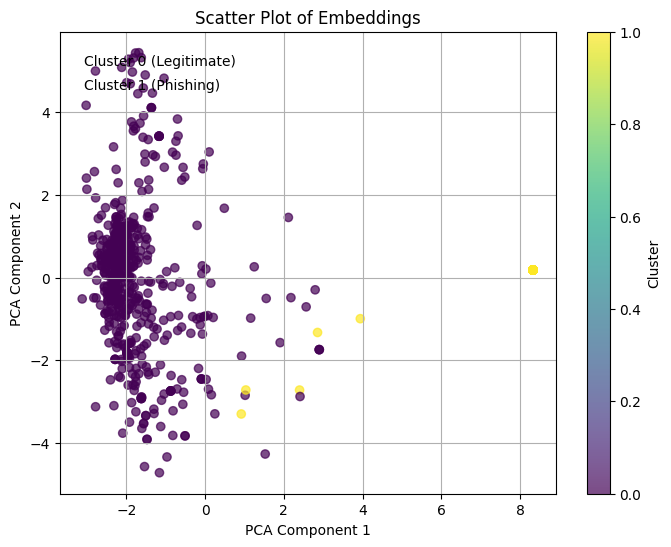

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of embeddings using PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(embedding_df_bert)

# Plot scatter plot of embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Mention clusters above the plot
plt.text(0.05, 0.95, f'Cluster 0 (Legitimate)', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.90, f'Cluster 1 (Phishing)', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


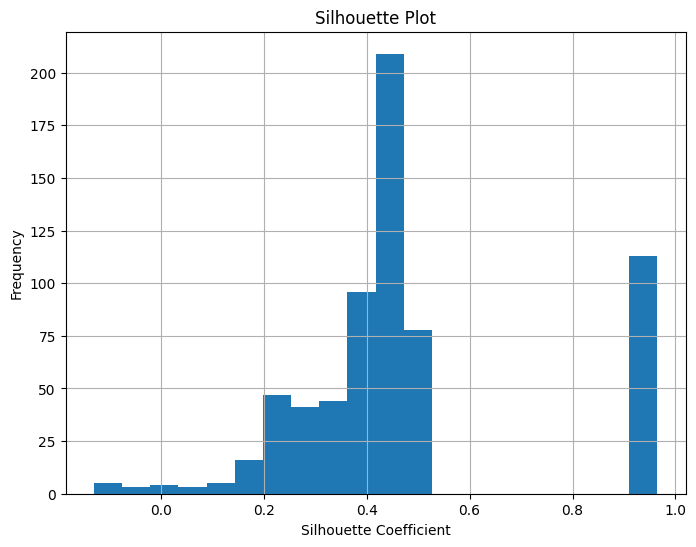

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

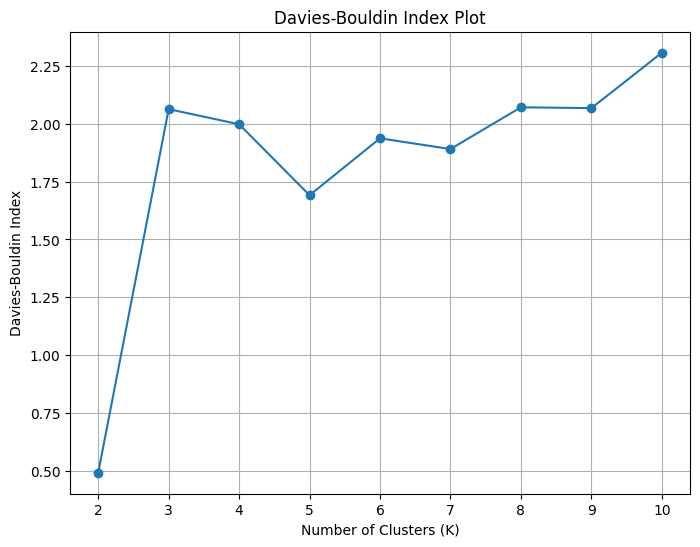

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

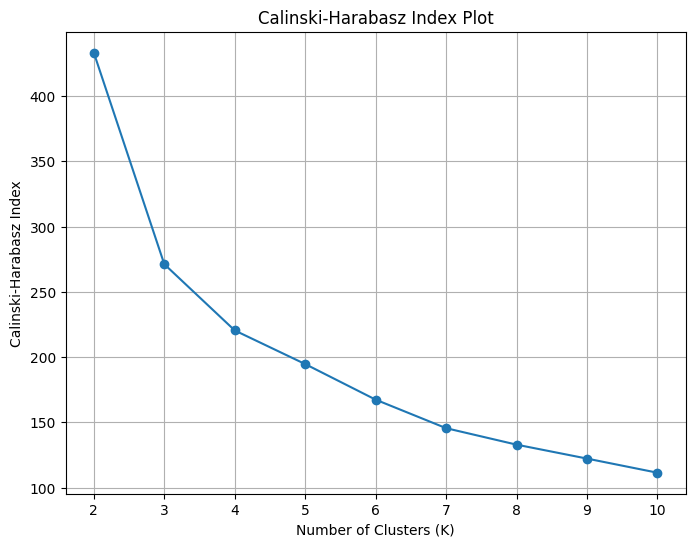

In [ ]:
from sklearn.metrics import silhouette_samples
import numpy as np
# Silhouette Plot
silhouette_values = silhouette_samples(embedding_df_bert, cluster_labels)
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Davies-Bouldin Plot
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_df_bert)
    db_scores.append(davies_bouldin_score(embedding_df_bert, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Calinski-Harabasz Plot
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_df_bert)
    ch_scores.append(calinski_harabasz_score(embedding_df_bert, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()


DEBERTA FOR TITLE ANALYSIS

In [ ]:
import torch
from transformers import DebertaTokenizer, DebertaModel
import pandas as pd

# Load pre-trained DeBERTa tokenizer and model
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
model = DebertaModel.from_pretrained('microsoft/deberta-base')

# Function to preprocess text and generate DeBERTa embeddings
def preprocess_and_embed(text):
    # Ensure text is a string
    text = str(text)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Generate DeBERTa embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze(0)  # Mean pooling of token embeddings

    return embeddings

# Load your dataset and extract the title column
df = pd.read_csv('/content/drive/MyDrive/MiniProject/cleaned_dataset - cleaned_dataset.csv')
title_column = df['title']

# Preprocess titles and generate DeBERTa embeddings
embeddings = []
for title in title_column:
    embeddings.append(preprocess_and_embed(title))

# Convert embeddings to a DataFrame
embedding_df = pd.DataFrame(torch.stack(embeddings).numpy())

# Now you can use embedding_df for further analysis such as clustering, classification, etc.


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

In [ ]:
print(embedding_df)

          0         1         2         3         4         5         6    \
0    0.000079  0.070252 -0.179508 -0.692654  0.244847  0.297841  0.114403   
1    0.026388 -0.499843 -0.537629 -0.249833 -0.079905  0.245440 -0.381194   
2   -0.230216  0.017549  0.063749 -0.869175  0.144009  0.306932 -0.184817   
3    0.271840 -0.230694 -0.125778 -0.390882  0.087729  0.272072 -0.197908   
4   -0.203926  0.012990 -0.298779 -0.576553 -0.288671  0.662713 -0.306467   
..        ...       ...       ...       ...       ...       ...       ...   
659 -0.554304 -0.127009 -0.180766 -0.628829 -0.032425  0.221738 -0.425065   
660  0.465833 -0.194216 -0.200196 -0.513521  0.669047  0.187625 -0.152395   
661  0.280306 -0.144679 -0.381667 -0.729200  0.107937  0.234276  0.087530   
662 -0.089687 -0.130764 -0.070167 -0.154480  0.116317  0.037006 -0.088287   
663  0.036614 -0.231569 -0.087449 -0.269104  0.011233 -0.026320 -0.136079   

          7         8         9    ...       758       759       760  \
0  

In [ ]:
from sklearn.cluster import KMeans

# Assuming embedding_df contains DeBERTa embeddings
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embedding_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assuming cluster 0 represents legitimate content and cluster 1 represents phishing content
# You may need to verify this based on the distribution of cluster labels and manual inspection
phishing_cluster = 1  # Adjust this if necessary

# Get indices of instances in the phishing cluster
phishing_indices = [i for i, label in enumerate(cluster_labels) if label == phishing_cluster]

# Print indices of potential phishing instances
print("Indices of potential phishing instances:", phishing_indices)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indices of potential phishing instances: [1, 7, 9, 14, 27, 32, 33, 36, 37, 38, 41, 46, 53, 58, 80, 85, 88, 98, 106, 110, 115, 116, 117, 119, 122, 123, 129, 133, 134, 137, 142, 166, 168, 171, 174, 175, 177, 179, 184, 187, 190, 192, 200, 206, 208, 210, 224, 228, 232, 236, 237, 238, 240, 243, 244, 251, 258, 262, 263, 273, 275, 279, 283, 291, 296, 301, 304, 308, 322, 327, 335, 338, 339, 342, 345, 346, 348, 349, 351, 354, 355, 358, 360, 363, 364, 367, 374, 375, 377, 379, 380, 382, 387, 390, 403, 411, 421, 422, 426, 439, 440, 458, 462, 470, 472, 474, 475, 476, 477, 478, 480, 484, 488, 494, 500, 501, 503, 506, 509, 515, 519, 525, 534, 539, 556, 560, 565, 568, 574, 580, 584, 585, 586, 594, 597, 604, 612, 614, 618, 621, 623, 626, 628, 631, 632, 635, 638, 639, 643, 647, 648, 651, 655, 662, 663]


In [ ]:
# Assuming embedding_df contains DeBERTa embeddings
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embedding_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assuming cluster 0 represents legitimate content and cluster 1 represents phishing content
# You may need to verify this based on the distribution of cluster labels and manual inspection
legitimate_cluster = 0
phishing_cluster = 1  # Adjust this if necessary

# Create lists to store the indices of instances in each cluster
legitimate_indices = [i for i, label in enumerate(cluster_labels) if label == legitimate_cluster]
phishing_indices = [i for i, label in enumerate(cluster_labels) if label == phishing_cluster]

# Print the clusters
print("Cluster 0 (Legitimate title):", legitimate_indices)
print("Cluster 1 (Phishing title):", phishing_indices)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Legitimate title): [0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 34, 35, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114, 118, 120, 121, 124, 125, 126, 127, 128, 130, 131, 132, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 172, 173, 176, 178, 180, 181, 182, 183, 185, 186, 188, 189, 191, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 229, 230, 231, 233, 234, 235, 239, 241, 242, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 259, 260, 261, 264, 265, 266, 267, 268, 269, 270

In [ ]:
# Assuming kmeans is your fitted KMeans model
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[ 0.00575631 -0.03541513 -0.06089433 ...  0.7663791  -0.5051947
   0.5223713 ]
 [ 0.10653189 -0.19122724 -0.22461838 ...  0.3855803  -0.21655378
   0.16634762]]


In [ ]:
kmeans.inertia_

41194.20703125

In [ ]:
# Assuming phishing_indices contains the indices of potential phishing instances identified by clustering

# Total number of samples
total_samples = embedding_df.shape[0]

# Number of samples identified as phishing
phishing_samples = len(phishing_indices)

print("Result: %d out of %d samples were identified as potential phishing instances." % (phishing_samples, total_samples))


Result: 155 out of 664 samples were identified as potential phishing instances.


In [ ]:
# Total number of samples
total_samples = embedding_df.shape[0]

# Number of samples identified as phishing by the BERT model
phishing_samples = len(phishing_indices)

# Calculate percentage
percentage_phishing = (phishing_samples / total_samples) * 100

print("Percentage of potential phishing instances: %.2f%%" % percentage_phishing)


Percentage of potential phishing instances: 23.34%


In [ ]:
# Count the number of instances in each cluster
phishing_count = sum(cluster_labels == phishing_cluster)
legitimate_count = len(cluster_labels) - phishing_count

print("Number of potential phishing instances:", phishing_count)
print("Number of legitimate instances:", legitimate_count)


Number of potential phishing instances: 155
Number of legitimate instances: 509


Evaluation metrics


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(embedding_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embedding_df, cluster_labels)
print("Davies–Bouldin Index:", db_index)

Silhouette Score: 0.051155046
Davies–Bouldin Index: 4.322833996644603


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz index
ch_score = calinski_harabasz_score(embedding_df, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 20.253199740369798


plot

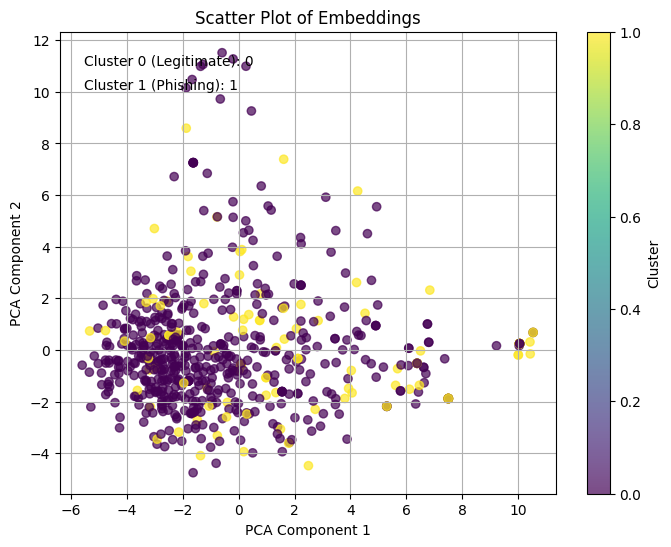

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Reduce dimensionality of embeddings using PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(embedding_df)

# Plot scatter plot of embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Mention clusters above the plot
plt.text(0.05, 0.95, f'Cluster 0 (Legitimate): {legitimate_cluster}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.90, f'Cluster 1 (Phishing): {phishing_cluster}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


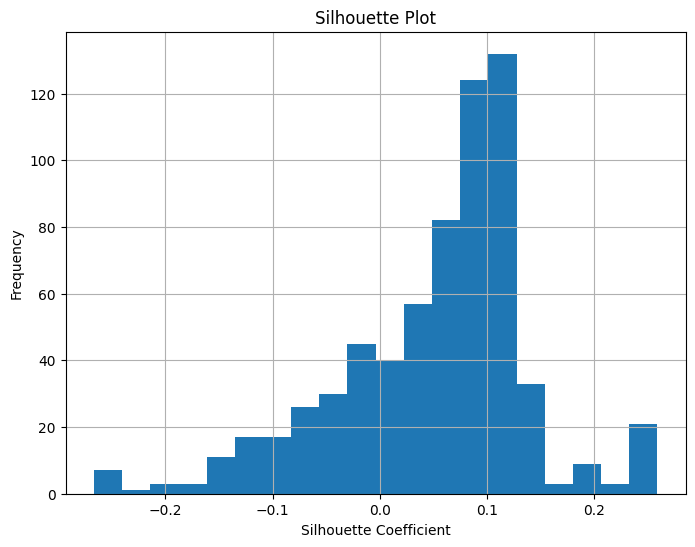

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

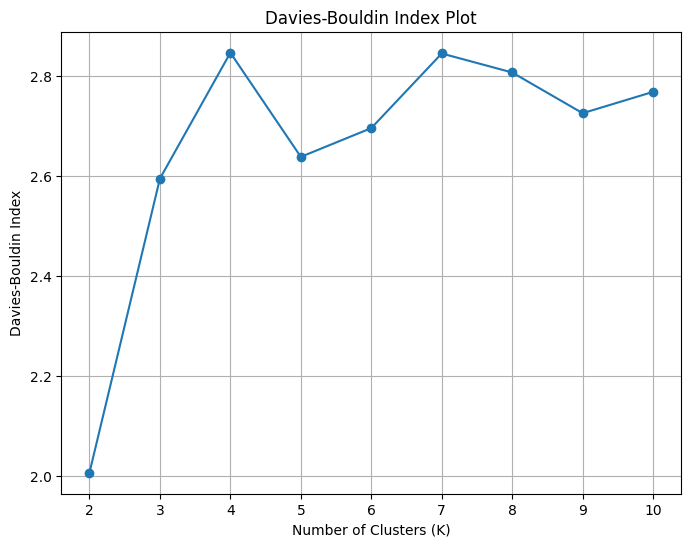

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

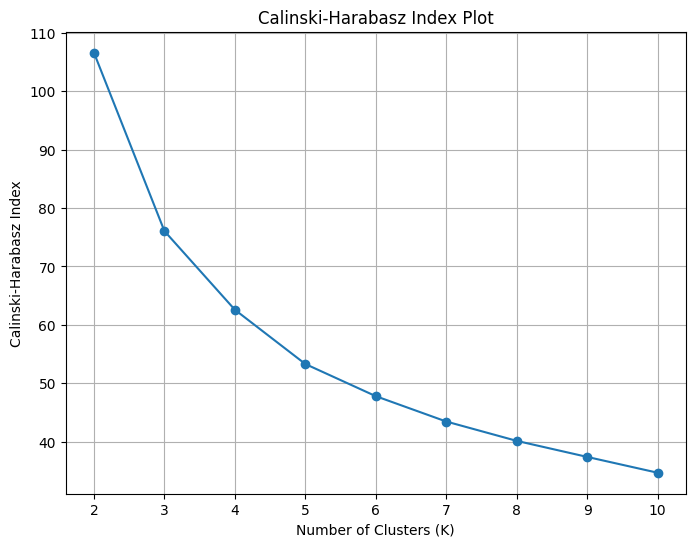

In [ ]:
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Silhouette Plot
silhouette_values = silhouette_samples(embedding_df, cluster_labels)
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Davies-Bouldin Plot
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_df)
    db_scores.append(davies_bouldin_score(embedding_df, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Calinski-Harabasz Plot
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_df)
    ch_scores.append(calinski_harabasz_score(embedding_df, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()

COMBINED RESULT


In [ ]:
# Get the phishing indices for DeBERTa and BERT embeddings
deberta_phishing_indices = [1, 7, 9, 14, 27, 32, 33, 36, 37, 38, 41, 46, 53, 58, 80, 85, 88, 98, 106, 110, 115, 116, 117, 119, 122, 123, 129, 133, 134, 137, 142, 166, 168, 171, 174, 175, 177, 179, 184, 187, 190, 192, 200, 206, 208, 210, 224, 228, 232, 236, 237, 238, 240, 243, 244, 251, 258, 262, 263, 273, 275, 279, 283, 291, 296, 301, 304, 308, 322, 327, 335, 338, 339, 342, 345, 346, 348, 349, 351, 354, 355, 358, 360, 363, 364, 367, 374, 375, 377, 379, 380, 382, 387, 390, 403, 411, 421, 422, 426, 439, 440, 458, 462, 470, 472, 474, 475, 476, 477, 478, 480, 484, 488, 494, 500, 501, 503, 506, 509, 515, 519, 525, 534, 539, 556, 560, 565, 568, 574, 580, 584, 585, 586, 594, 597, 604, 612, 614, 618, 621, 623, 626, 628, 631, 632, 635, 638, 639, 643, 647, 648, 651, 655, 662, 663]  # Example phishing indices for DeBERTa embeddings
bert_phishing_indices = [0, 5, 9, 14, 26, 28, 51, 54, 73, 112, 117, 120, 123, 125, 137, 141, 162, 164, 179, 201, 211, 217, 224, 226, 233, 236, 237, 238, 240, 244, 251, 252, 255, 258, 259, 261, 262, 263, 267, 272, 279, 291, 296, 304, 306, 311, 318, 322, 326, 331, 333, 338, 339, 342, 348, 356, 358, 360, 362, 363, 365, 367, 375, 384, 386, 387, 388, 390, 397, 403, 407, 422, 424, 439, 440, 453, 455, 458, 465, 469, 474, 476, 486, 487, 494, 498, 501, 503, 522, 531, 535, 537, 540, 554, 574, 580, 583, 584, 585, 590, 591, 597, 604, 614, 618, 620, 625, 630, 635, 638, 639, 652, 657, 663]   # Example phishing indices for BERT embeddings

# Intersection of phishing indices
intersection_phishing_indices = list(set(deberta_phishing_indices) & set(bert_phishing_indices))

# Union of phishing indices
union_phishing_indices = list(set(deberta_phishing_indices) | set(bert_phishing_indices))

# Analyze the instances corresponding to the intersection and union
print("Instances marked as phishing by both DeBERTa and BERT:", intersection_phishing_indices)
print("Instances marked as phishing by at least one model:", union_phishing_indices)


Instances marked as phishing by both DeBERTa and BERT: [258, 387, 262, 263, 390, 9, 137, 14, 403, 663, 279, 291, 422, 296, 304, 179, 439, 440, 574, 322, 580, 584, 585, 458, 338, 339, 597, 342, 474, 604, 348, 476, 224, 503, 614, 358, 360, 618, 123, 236, 237, 238, 251, 240, 363, 367, 494, 244, 117, 501, 375, 635, 638, 639]
Instances marked as phishing by at least one model: [0, 1, 515, 5, 7, 519, 9, 522, 525, 14, 531, 534, 535, 537, 26, 27, 539, 28, 540, 32, 33, 36, 37, 38, 41, 554, 556, 46, 560, 51, 53, 565, 54, 568, 58, 574, 580, 583, 584, 585, 586, 73, 590, 591, 80, 594, 85, 597, 88, 604, 98, 612, 614, 106, 618, 620, 621, 110, 623, 112, 625, 626, 115, 116, 117, 628, 119, 631, 632, 122, 123, 635, 630, 638, 639, 120, 129, 125, 643, 133, 134, 647, 648, 137, 651, 652, 141, 142, 655, 657, 662, 663, 162, 164, 166, 168, 171, 174, 175, 177, 179, 184, 187, 190, 192, 200, 201, 206, 208, 210, 211, 217, 224, 226, 228, 232, 233, 236, 237, 238, 240, 243, 244, 251, 252, 255, 258, 259, 261, 262, 263,

COMBINED RESULT

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming you have embeddings from BERT and DeBERTa stored in bert_embeddings and deberta_embeddings respectively
# Shape of bert_embeddings: (num_samples, bert_embedding_dim)
# Shape of deberta_embeddings: (num_samples, deberta_embedding_dim)

# Step 1: Combine embeddings
combined_embeddings = np.concatenate((embedding_df_bert, embedding_df), axis=1)

# Step 2: Clustering
# Example: Using KMeans clustering
num_clusters = 2  # Since you only need 2 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(combined_embeddings)

# Step 3: Print cluster indices
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num} indices:")
    cluster_indices = np.where(cluster_labels == cluster_num)[0]
    print(cluster_indices)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 indices:
[  1   2   3   4   6   7   8  10  11  12  13  15  16  17  18  19  20  21
  22  23  24  25  27  29  30  31  32  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  52  53  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 113 114 115 116 118 119
 121 122 124 126 127 128 129 130 131 132 133 134 135 136 138 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 163 165 166 167 168 169 170 171 172 173 174 175 176 177 178 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 202 203 204 205 206 207 208 209 210 212 213 214 215 216 218 219 220 221
 222 223 225 227 228 229 230 231 232 234 235 239 241 242 243 245 246 247
 248 249 250 253 254 256 257 260 264 265 266 268 269 270 271 273 274 275
 276 277 278 280 281 282 283 284

Evaluation metrics

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(combined_embeddings, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(combined_embeddings, cluster_labels)
print("Davies–Bouldin Index:", db_index)



Silhouette Score: 0.20074546
Davies–Bouldin Index: 1.7172532271903305


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz index
ch_score = calinski_harabasz_score(combined_embeddings, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 117.03832991838635


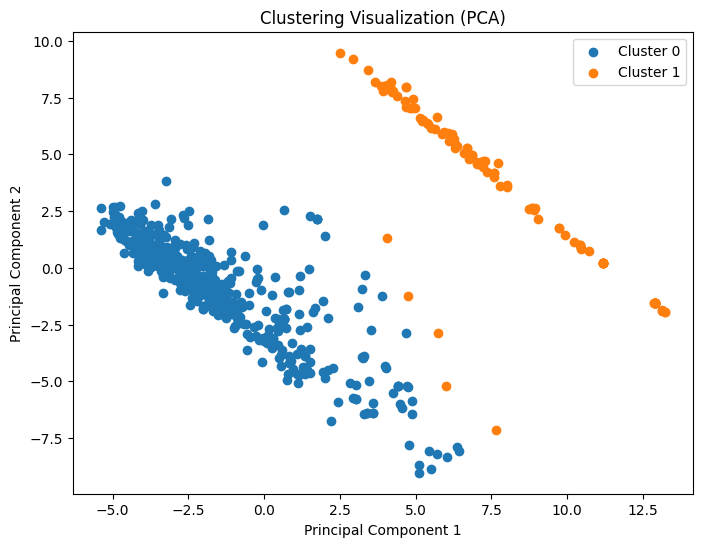

In [ ]:
#Step 4: Visualization
# Example: Using PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(combined_embeddings)

plt.figure(figsize=(8, 6))
for cluster_num in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_num)[0]
    plt.scatter(reduced_embeddings[cluster_indices, 0], reduced_embeddings[cluster_indices, 1], label=f'Cluster {cluster_num}')

plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

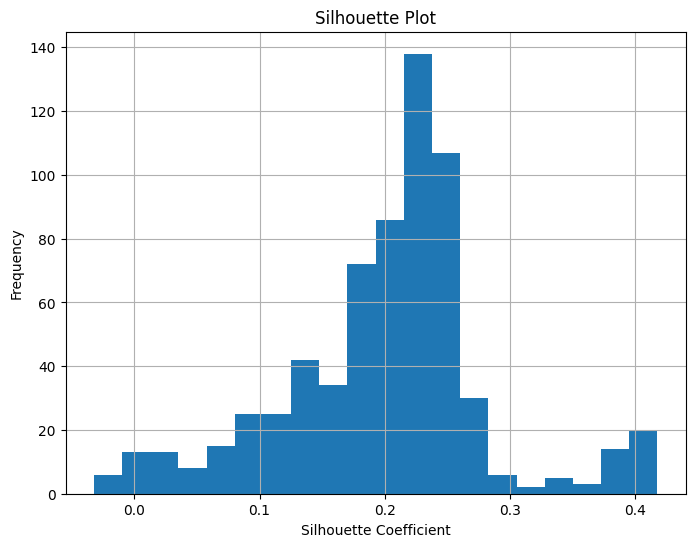

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

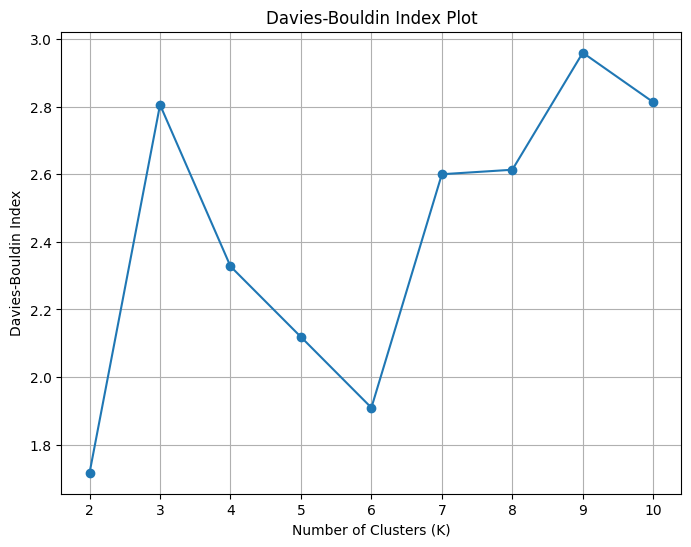

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

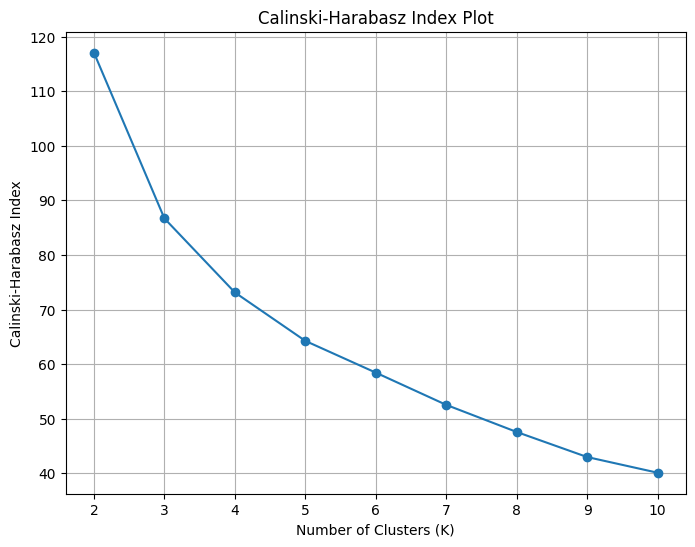

In [ ]:
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score

# Step 4: Silhouette Plot
silhouette_values = silhouette_samples(combined_embeddings, cluster_labels)
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Davies-Bouldin Plot
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_embeddings)
    db_scores.append(davies_bouldin_score(combined_embeddings, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Step 6: Calinski-Harabasz Plot
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_embeddings)
    ch_scores.append(calinski_harabasz_score(combined_embeddings, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Index Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()